<h1 style="text-align: center">Sprint 8: ML Unsupervised</h1>

**EJERCICIO 1:**: Descarga el dataset adjunto, de registros de publicaciones en Facebook sobre Tailandia, y clasifica los diferentes registros utilizando el algoritmo de K-means.

In [8]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
#leyendo los datos
df = pd.read_csv('Publicacions_Facebook_Thailandia.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [2]:
#nos aeguramos que ninguna columna tenga todo nulo y lo eliminamos
df = df.dropna(axis=1, how='all')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


In [3]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [4]:
#EL algoritmo de k-means no funciona con variables categóricas, por lo que tenemos que preprocesar los datos
#para ello, vamos a convertir las variables categóricas en numéricas, en primer lugar, la columna 'status_id' no 
#nos aporta información, por lo que la eliminamos
df = df.drop(['status_id'], axis=1)
df.head()

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


'' El algoritmo K-means es una técnica de clustering (agrupamiento) que tiene como objetivo particionar un conjunto de datos en K grupos (clústeres) distintos basados en las características de los datos. ''

In [5]:
#ahora tenemos dos columnas categóricas, 'status_type' y 'status_published', vamos a convertirlas en numéricas
#para ello, vamos a usar el método de pandas get_dummies
df_encoded = pd.get_dummies(df, columns=['status_type'])
df_encoded.head()

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,False,False,False,True
1,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,False,True,False,False
2,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,False,False,False,True
3,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,False,True,False,False
4,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,False,True,False,False


In [6]:
#ahora vamos a convertir la columna 'status_published' en numérica, para ello, vamos a convertir la fecha en segundos
df_encoded['status_published'] = pd.to_datetime(df_encoded['status_published'])
df_encoded['status_published'] = (df_encoded['status_published'] - df_encoded['status_published'].min()) / pd.Timedelta(seconds=1)
df_encoded.head()

,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,182056140.0,529,512,262,432,92,3,1,1,0,False,False,False,True
1,182030040.0,150,0,0,150,0,0,0,0,0,False,True,False,False
2,181970760.0,227,236,57,204,21,1,1,0,0,False,False,False,True
3,181957080.0,111,0,0,111,0,0,0,0,0,False,True,False,False
4,181701060.0,213,0,0,204,9,0,0,0,0,False,True,False,False


In [28]:
#Escalamos las carácteristicas  debido a que k-means es sensible a la escala de las variables, usare StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()

df_scaled = df_encoded.copy()

df_scaled = scaler.fit_transform(df_encoded)

#Aplicamos k-means con 4 clúster  éste valor es arbitrario.
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(df_scaled)

KMeans(n_clusters=4, random_state=1)

In [41]:
df_scaled.shape

(7050, 15)

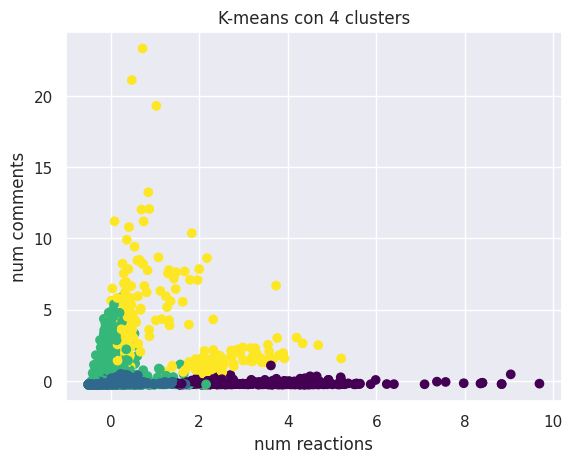

In [42]:
#graficamos los clusters
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.scatter(df_scaled[:,1], df_scaled[:,2], c=kmeans.labels_, cmap='viridis')
plt.xlabel('num reactions')
plt.ylabel('num comments')
plt.title('K-means con 4 clusters')
plt.show()

```Interpretación: La grafica muestra la distribución de los 4 clústeres elegidos arbitrariamente, como se observa, hay  puntos que se superponen entre los clusters, por lo que no es una clasificación muy precisa.```

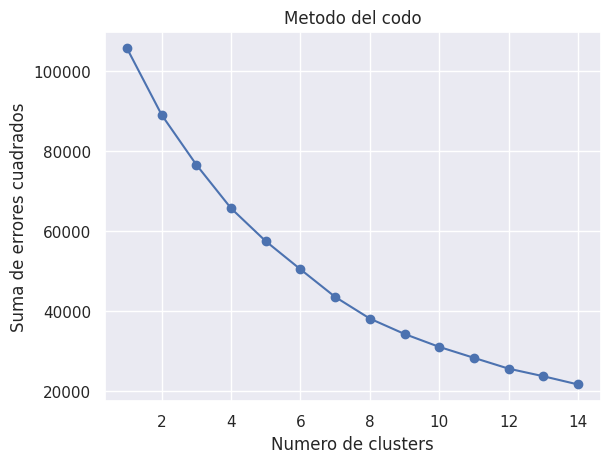

In [43]:
#dado que no sabemos cuantos clusters hay, usamos el metodo del codo, para elegir el numero de clusters optimo
X = df_scaled

sec = [] #sum of squared errors
#ejecutamos k-means para un rango de valores de k
k_range = range(1,15)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    sec.append(km.inertia_)

#graficamos los resultados
plt.plot(k_range, sec, marker='o')
plt.xlabel('Numero de clusters')
plt.ylabel('Suma de errores cuadrados')
plt.title('Metodo del codo')
plt.show()

```La gráfica producida por el método del codo no muestra un punto de quiebre claro, por lo que puede ser difícil determinar el número óptimo de clústeres. En tales casos, se pueden explorar varias estrategias alternativas para ayudar a decidir el número adecuado de clústeres.```

**EJERCICIO 2:**: Clasifica los distintos registros utilizando el algoritmo de clustering jerárquico.

* El algoritmo de clustering jerárquico es una técnica que construye una jerarquía de clústeres y no requiere que se especifique el número de clústeres a priori. 

In [44]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [45]:
# Crear el modelo
hclustering = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')

# Ajustar el modelo
hclustering.fit(X)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

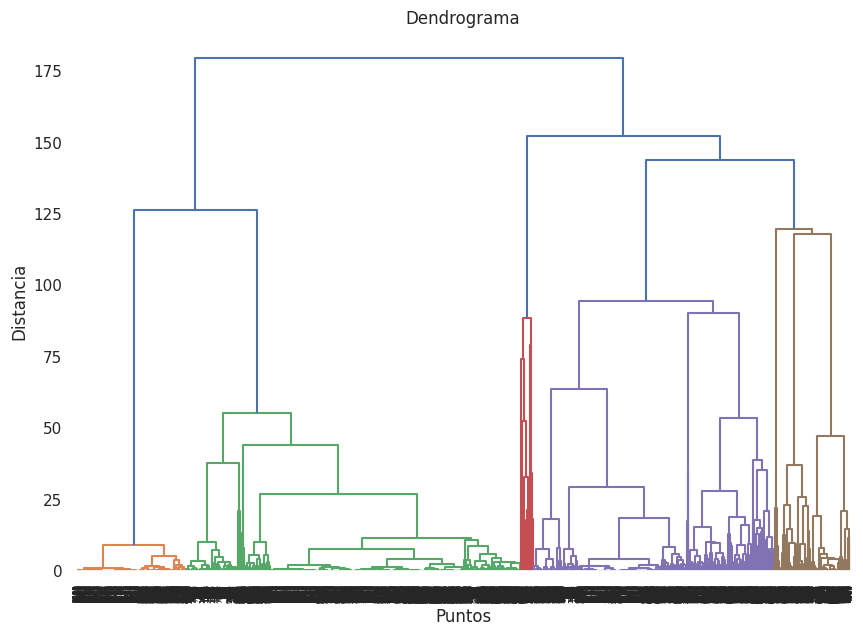

In [46]:
# Crear el dendrograma
linked = linkage(X, method='ward') #method='ward' es el método que minimiza la varianza dentro de cada clúster

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma')
plt.xlabel('Puntos')
plt.ylabel('Distancia')
plt.show()


```Se observa en el dendograma que el algoritmo de clustering jerárquico ha clusterizado en 5 grupos.```

**EJERCICIO 3:**: Calcula el rendimiento del clustering mediante un parámetro como puede ser silueta.

* Usaré el coedificiente de silueta que es una medida comunmente usada para estimar la calidad de un clustering. 

```El valor del coeficiente de silueta oscila entre -1 y 1. Si es cercano a 1, los clústeres están bien apartados y bien agrupados, si el coeficiente es cercano a -1, los clústeres estan incorrectamente agrupados y un coeficiente cercano a 0 indica clústeres superpuestos.```

In [47]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import numpy as np

In [56]:
#Crearemos el clusting con 3 clusters
hclustering = AgglomerativeClustering(n_clusters=5, linkage='ward')
hclustering.fit(X)

#Calculamos el coeficiente de silueta
silhouette_avg = silhouette_score(X, hclustering.labels_)
print("Para n_clusters =", 5,
      "El coeficiente de silueta promedio es :", silhouette_avg)

Para n_clusters = 5 El coeficiente de silueta promedio es : 0.4922728885401961


<<El resultado indica que 5 clústeres están superpuestos, ya que el coeficiente de silueta es 0.49>>

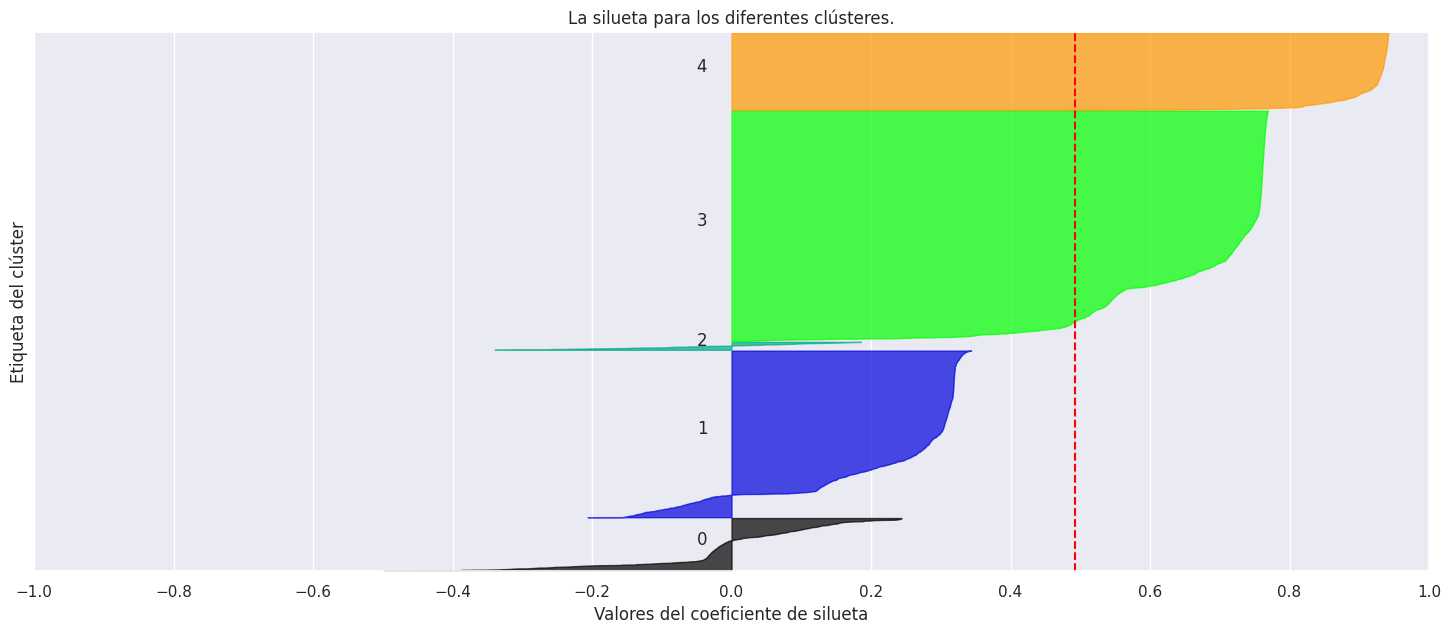

In [57]:
# Calcula los valores de silueta para cada muestra
sample_silhouette_values = silhouette_samples(X, hclustering.labels_)

# Crea una figura
fig, ax = plt.subplots()
fig.set_size_inches(18, 7)

# El primer subplot mostrará el coeficiente de silueta
# que puede tener valores en el rango [-1, 1]
ax.set_xlim([-1, 1])
# El número de clústeres a insertar determinará el rango de valores en Y
n_clusters = len(set(hclustering.labels_))
ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[hclustering.labels_ == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Etiqueta los plots con sus números de clústeres en el medio
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Calcula el nuevo y_lower para el siguiente plot
    y_lower = y_upper + 10

ax.set_title("La silueta para los diferentes clústeres.")
ax.set_xlabel("Valores del coeficiente de silueta")
ax.set_ylabel("Etiqueta del clúster")

# La línea vertical para el coeficiente de silueta promedio
ax.axvline(x=silhouette_avg, color="red", linestyle="--")

ax.set_yticks([])  # Limpiar las etiquetas y_ticks
ax.set_xticks([-1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

**Intrepretación:** Los clusteres que continen coeficientes negativos nos indica valores dentro de ese clúster que no estan bien representados, consecuentemente, la media del coeficiente de silueta es cercano a 0 lo que indica una superposicion de clusters.